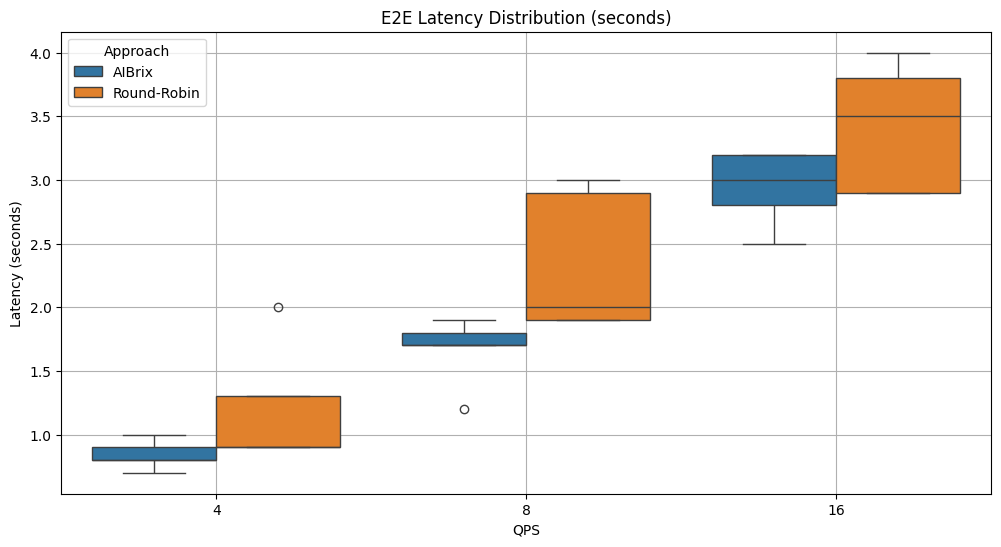

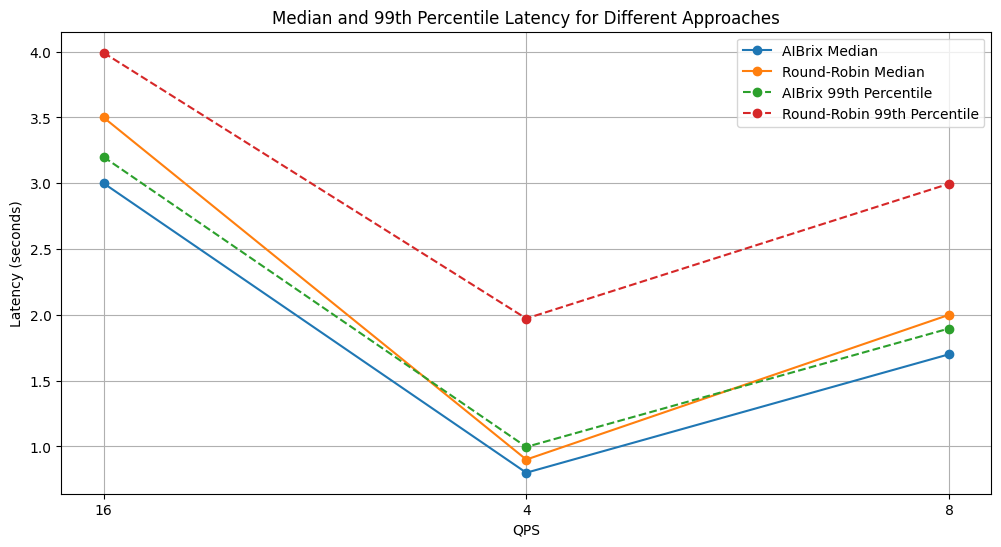

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# CSV data dictionary
title = "E2E Latency Distribution (seconds)"
csv_data_dict = {
    4: """Time,AIBrix,Round-Robin
    0,0.9,0.9
    1,0.8,0.9
    2,0.7,0.9
    3,0.8,1.3
    4,1.0,2
    """,
    8: """Time,AIBrix,Round-Robin
    0,1.9,1.9
    1,1.7,2.9
    2,1.7,1.9
    3,1.2,3
    4,1.8,2
    """,
    16: """Time,AIBrix,Round-Robin
    0,3.2,4
    1,3.2,2.9
    2,3,3.5
    3,2.8,2.9
    4,2.5,3.8
    """,
}

# Step 1: Parse the CSV strings into DataFrames
dfs = []
for qps, csv_str in csv_data_dict.items():
    df = pd.read_csv(StringIO(csv_str))
    df['QPS'] = qps
    dfs.append(df)

# Step 2: Combine the DataFrames
combined_df = pd.concat(dfs)
combined_df['QPS'] = combined_df['QPS'].astype(str)

# Step 3: Melt the combined DataFrame for easier plotting
melted_df = pd.melt(combined_df, id_vars=['Time', 'QPS'], value_vars=['AIBrix', 'Round-Robin'], var_name='Approach', value_name='Latency')

# Step 4: Create grouped box plot for latency distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='QPS', y='Latency', hue='Approach')
plt.xlabel('QPS')
plt.ylabel('Latency (seconds)')
plt.title(title)
plt.legend(title='Approach')
plt.grid(True)
plt.show()

# Step 5: Calculate median and 99th percentile latencies
summary_df = combined_df.groupby(['QPS']).agg({
    'AIBrix': ['median', lambda x: np.percentile(x, 99)],
    'Round-Robin': ['median', lambda x: np.percentile(x, 99)]
}).reset_index()
summary_df.columns = ['QPS', 'AIBrix Median', 'AIBrix 99th Percentile', 'Round-Robin Median', 'Round-Robin 99th Percentile']

# Create line plot for median and 99th percentile latencies
plt.figure(figsize=(12, 6))

# Median plot
plt.plot(summary_df['QPS'], summary_df['AIBrix Median'], marker='o', linestyle='-', label='AIBrix Median')
plt.plot(summary_df['QPS'], summary_df['Round-Robin Median'], marker='o', linestyle='-', label='Round-Robin Median')

# 99th Percentile plot
plt.plot(summary_df['QPS'], summary_df['AIBrix 99th Percentile'], marker='o', linestyle='--', label='AIBrix 99th Percentile')
plt.plot(summary_df['QPS'], summary_df['Round-Robin 99th Percentile'], marker='o', linestyle='--', label='Round-Robin 99th Percentile')

plt.xlabel('QPS')
plt.ylabel('Latency (seconds)')
plt.title('Median and 99th Percentile Latency for Different Approaches')
plt.legend()
plt.grid(True)
plt.show()

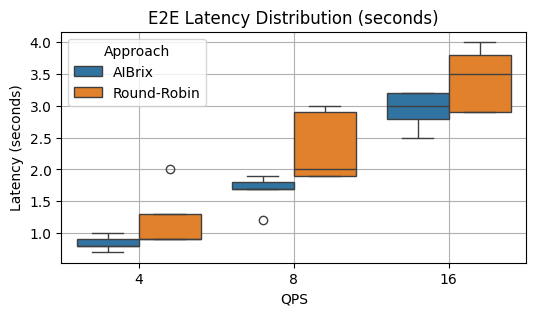

/var/folders/fr/tdgd1l9x1x7drdw1hdcdjrc00000gn/T/ipykernel_3898/1869046845.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = combined_df.groupby(['QPS']).agg({


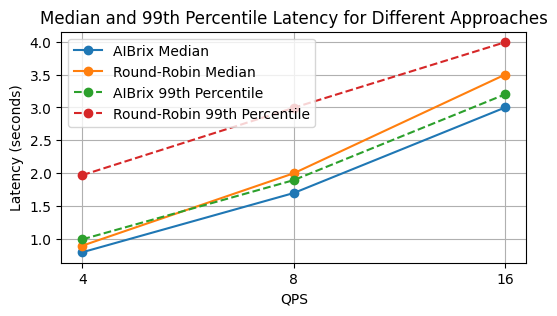

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# CSV data dictionary
title = "E2E Latency Distribution (seconds)"
csv_data_dict = {
    4: """Time,AIBrix,Round-Robin
    0,0.9,0.9
    1,0.8,0.9
    2,0.7,0.9
    3,0.8,1.3
    4,1.0,2
    """,
    8: """Time,AIBrix,Round-Robin
    0,1.9,1.9
    1,1.7,2.9
    2,1.7,1.9
    3,1.2,3
    4,1.8,2
    """,
    16: """Time,AIBrix,Round-Robin
    0,3.2,4
    1,3.2,2.9
    2,3,3.5
    3,2.8,2.9
    4,2.5,3.8
    """,
}

# Step 1: Parse the CSV strings into DataFrames
dfs = []
for qps, csv_str in csv_data_dict.items():
    df = pd.read_csv(StringIO(csv_str))
    df['QPS'] = qps
    dfs.append(df)

# Step 2: Combine the DataFrames
combined_df = pd.concat(dfs)

# Convert 'QPS' to string first
combined_df['QPS'] = combined_df['QPS'].astype(str)

# Ensure QPS is an ordered categorical type to sort on plots
sorted_qps = sorted(csv_data_dict.keys())
combined_df['QPS'] = pd.Categorical(combined_df['QPS'], categories=[str(qps) for qps in sorted_qps], ordered=True)

# Step 3: Melt the combined DataFrame for easier plotting
melted_df = pd.melt(combined_df, id_vars=['Time', 'QPS'], value_vars=['AIBrix', 'Round-Robin'], var_name='Approach', value_name='Latency')

# Step 4: Create grouped box plot for latency distribution
plt.figure(figsize=(6, 3))
sns.boxplot(data=melted_df, x='QPS', y='Latency', hue='Approach')
plt.xlabel('QPS')
plt.ylabel('Latency (seconds)')
plt.title(title)
plt.legend(title='Approach')
plt.grid(True)
plt.show()

# Step 5: Calculate median and 99th percentile latencies
summary_df = combined_df.groupby(['QPS']).agg({
    'AIBrix': ['median', lambda x: np.percentile(x, 99)],
    'Round-Robin': ['median', lambda x: np.percentile(x, 99)]
}).reset_index()
summary_df.columns = ['QPS', 'AIBrix Median', 'AIBrix 99th Percentile', 'Round-Robin Median', 'Round-Robin 99th Percentile']

# Step 6: Ensure the 'QPS' column in summary_df is ordered correctly
summary_df['QPS'] = pd.Categorical(summary_df['QPS'], categories=[str(qps) for qps in sorted_qps], ordered=True)
summary_df = summary_df.sort_values('QPS')

# Create line plot for median and 99th percentile latencies
plt.figure(figsize=(6, 3))

# Median plot
plt.plot(summary_df['QPS'].astype(str), summary_df['AIBrix Median'], marker='o', linestyle='-', label='AIBrix Median')
plt.plot(summary_df['QPS'].astype(str), summary_df['Round-Robin Median'], marker='o', linestyle='-', label='Round-Robin Median')

# 99th Percentile plot
plt.plot(summary_df['QPS'].astype(str), summary_df['AIBrix 99th Percentile'], marker='o', linestyle='--', label='AIBrix 99th Percentile')
plt.plot(summary_df['QPS'].astype(str), summary_df['Round-Robin 99th Percentile'], marker='o', linestyle='--', label='Round-Robin 99th Percentile')

plt.xlabel('QPS')
plt.ylabel('Latency (seconds)')
plt.title('Median and 99th Percentile Latency for Different Approaches')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/cw/mdpd8d8j7g10qxq96v7_v64w0000gn/T/ipykernel_35414/1794741744.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Approach', y='Latency', order=list(approach_mapping.values()), palette=colors)


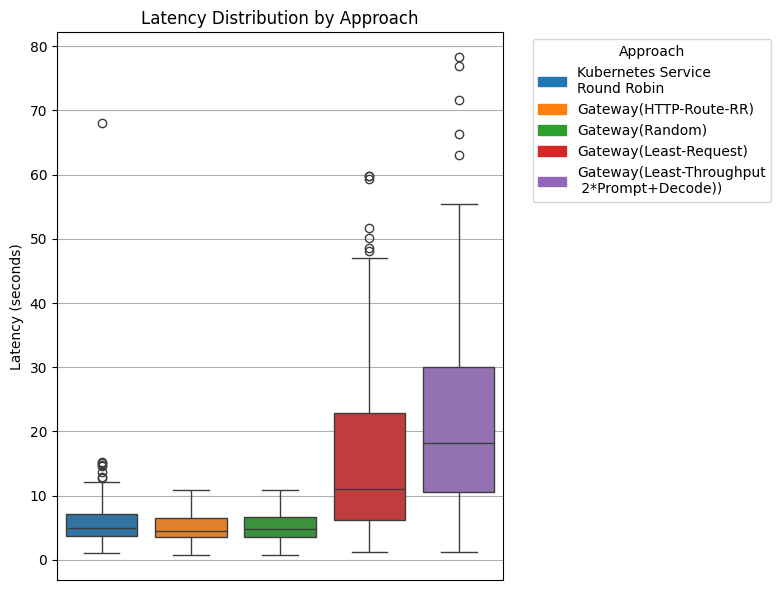

In [38]:
# I have a directory that contains a bunch of .jsonl file that contain list of latencies collected from three different approaches. You can find the name of the apporach from the file name, e.g., "random.jsonl" is the result collected from random approach. 

# I'd like to generate a box plot showing the latency distribution of each of these approaches. 

# Here is an example result from the log file: 
# {"model": "deepseek-coder-7b-instruct", "prompt": "How to tell if a customer segment is well segmented? In 3 bullet points.", "output": "I'm sorry, but as an AI Programming Assistant, I specialize in computer science and programming-related questions. I'm not equipped to provide guidance on marketing or business strategy. I recommend seeking advice from a professional in the field of marketing or business strategy.\n", "prompt_tokens": 86, "output_tokens": 57, "total_tokens": 143, "latency": 1.989893913269043, "throughput": 28.644743129224967}
# kubernetes - round robin
# Gateway - HTTP Route -> Kubernete - round robin # 这个和baseline的区别是多了一层gateway overhead
# Gateway - random
# Gateway - least-of-request
# Gateway - throughput

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import matplotlib.patches as mpatches

# Directory containing the .jsonl files
directory = 'gateway-routing-benchmark-result'  # change this to the actual folder path

# Mapping dictionary to replace approach names with descriptive labels
approach_mapping = {
    'k8s-service': 'Kubernetes Service\nRound Robin',
    'http-route': 'Gateway(HTTP-Route-RR)',
    'random': 'Gateway(Random)',
    'least-request': 'Gateway(Least-Request)',
    'least-throughput': 'Gateway(Least-Throughput\n 2*Prompt+Decode))'
}
approach_labels = list(approach_mapping.values())

# List to store all latency data with their corresponding approach
latency_data = []

# Define the specific order you want for the approaches
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
approach_order = ['k8s-service', 'http-route', 'random', 'least-request', 'least-throughput']

# Read all .jsonl files and extract latencies
for file_path in glob(os.path.join(directory, '*.jsonl')):
    # Extract the approach name from the file name
    file_name = os.path.basename(file_path)
    approach = file_name.split('.')[0]  # Everything before .jsonl is the approach name

    # Read the file and extract latencies
    with open(file_path, 'r') as f:
        for line in f:
            result = json.loads(line)
            latency = result['latency']
            # Use the mapping dictionary to get a descriptive name
            descriptive_approach = approach_mapping.get(approach, approach)
            latency_data.append({'Approach': descriptive_approach, 'Latency': latency})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(latency_data)

# Ensure the 'Approach' column is a categorical dtype with the specified order
df['Approach'] = pd.Categorical(df['Approach'], categories=list(approach_mapping.values()), ordered=True)
# Update the label for least-throughput in the DataFrame

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Approach', y='Latency', order=list(approach_mapping.values()), palette=colors)

plt.xticks([])  # Rotate labels 90 degrees, center-align, and increase font size
plt.xlabel('')
plt.ylabel('Latency (seconds)')
plt.title('Latency Distribution by Approach')
plt.grid(True)

patches = [mpatches.Patch(color=colors[i], label=approach_labels[i]) for i in range(len(approach_labels))]
plt.legend(handles=patches, title="Approach", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


/var/folders/cw/mdpd8d8j7g10qxq96v7_v64w0000gn/T/ipykernel_35414/3351022903.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()


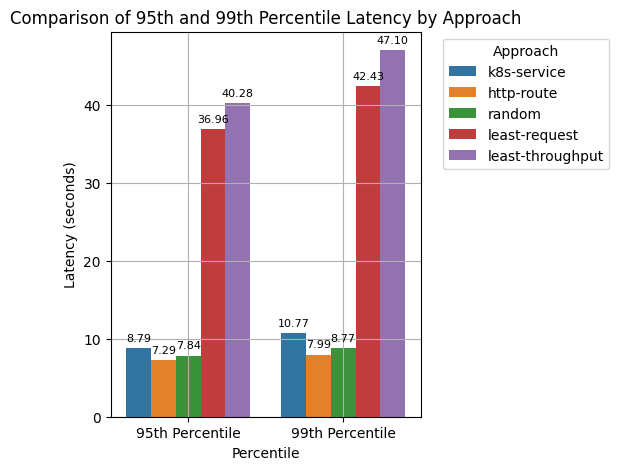

In [34]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Directory containing the .jsonl files
directory = 'gateway-routing-benchmark-result'  # change this to the actual folder path

# List to store all latency data with their corresponding approach
latency_data = []

# Define the specific order you want for the approaches
approach_order = ['k8s-service', 'http-route', 'random', 'least-request', 'least-throughput']  # Modify this list based on your desired order

# Read all .jsonl files and extract latencies
for file_path in glob(os.path.join(directory, '*.jsonl')):
    # Extract the approach name from the file name
    file_name = os.path.basename(file_path)
    approach = file_name.split('.')[0]  # Everything before .jsonl is the approach name

    # Read the file and extract latencies
    with open(file_path, 'r') as f:
        for line in f:
            result = json.loads(line)
            latency = result['latency']
            latency_data.append({'Approach': approach, 'Latency': latency})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(latency_data)

# Ensure the 'Approach' column is a categorical dtype with the specified order
df['Approach'] = pd.Categorical(df['Approach'], categories=approach_order, ordered=True)

# Calculate the 95th and 99th percentiles for each approach
percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()

# Rename columns for clarity
percentiles.columns = ['95th Percentile', '99th Percentile']

# Reset the index to make 'Approach' a column again
percentiles = percentiles.reset_index()

# Melt the DataFrame for easier plotting with seaborn
melted_percentiles = pd.melt(percentiles, id_vars=['Approach'], value_vars=['95th Percentile', '99th Percentile'],
                             var_name='Percentile', value_name='Latency')

# Order the melted DataFrame for grouped bar plot
melted_percentiles['Percentile'] = pd.Categorical(melted_percentiles['Percentile'], categories=['95th Percentile', '99th Percentile'], ordered=True)
melted_percentiles = melted_percentiles.sort_values(['Percentile', 'Approach'])

# Plot the grouped bar plot
plt.figure(figsize=(4, 5))
ax = sns.barplot(data=melted_percentiles, x='Percentile', y='Latency', hue='Approach')

# Add the actual values on each bar
for p in ax.patches:
    if p.get_height() == 0:
        continue
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.xlabel('Percentile')
plt.ylabel('Latency (seconds)')
plt.title('Comparison of 95th and 99th Percentile Latency by Approach')
plt.grid(True)
plt.legend(title='Approach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/cw/mdpd8d8j7g10qxq96v7_v64w0000gn/T/ipykernel_35414/2194213145.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()


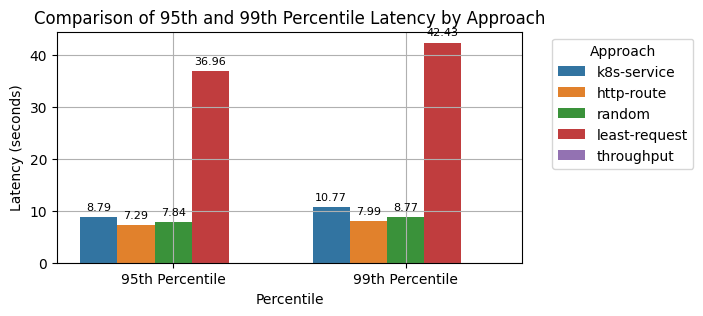

In [33]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Directory containing the .jsonl files
directory = 'gateway-routing-benchmark-result'  # change this to the actual folder path

# List to store all latency data with their corresponding approach
latency_data = []

# Define the specific order you want for the approaches
approach_order = ['k8s-service', 'http-route', 'random', 'least-request', 'throughput']  # Modify this list based on your desired order

# Read all .jsonl files and extract latencies
for file_path in glob(os.path.join(directory, '*.jsonl')):
    # Extract the approach name from the file name
    file_name = os.path.basename(file_path)
    approach = file_name.split('.')[0]  # Everything before .jsonl is the approach name

    # Read the file and extract latencies
    with open(file_path, 'r') as f:
        for line in f:
            result = json.loads(line)
            latency = result['latency']
            latency_data.append({'Approach': approach, 'Latency': latency})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(latency_data)

# Ensure the 'Approach' column is a categorical dtype with the specified order
df['Approach'] = pd.Categorical(df['Approach'], categories=approach_order, ordered=True)

# Calculate the 95th and 99th percentiles for each approach
percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()

# Rename columns for clarity
percentiles.columns = ['95th Percentile', '99th Percentile']

# Reset the index to make 'Approach' a column again
percentiles = percentiles.reset_index()

# Melt the DataFrame for easier plotting with seaborn
melted_percentiles = pd.melt(percentiles, id_vars=['Approach'], value_vars=['95th Percentile', '99th Percentile'],
                             var_name='Percentile', value_name='Latency')

# Order the melted DataFrame for grouped bar plot
melted_percentiles['Percentile'] = pd.Categorical(melted_percentiles['Percentile'], categories=['95th Percentile', '99th Percentile'], ordered=True)
melted_percentiles = melted_percentiles.sort_values(['Percentile', 'Approach'])

# Plot the grouped bar plot
plt.figure(figsize=(6, 3))
ax = sns.barplot(data=melted_percentiles, x='Percentile', y='Latency', hue='Approach')

# Add the actual values on each bar
for p in ax.patches:
    if p.get_height() == 0:
        continue
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.xlabel('Percentile')
plt.ylabel('Latency (seconds)')
plt.title('Comparison of 95th and 99th Percentile Latency by Approach')
plt.grid(True)
plt.legend(title='Approach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Combined Diagram

/var/folders/cw/mdpd8d8j7g10qxq96v7_v64w0000gn/T/ipykernel_35414/2137258312.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()
/var/folders/cw/mdpd8d8j7g10qxq96v7_v64w0000gn/T/ipykernel_35414/2137258312.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Approach', y='Latency', palette=colors, ax=ax1, legend=False)


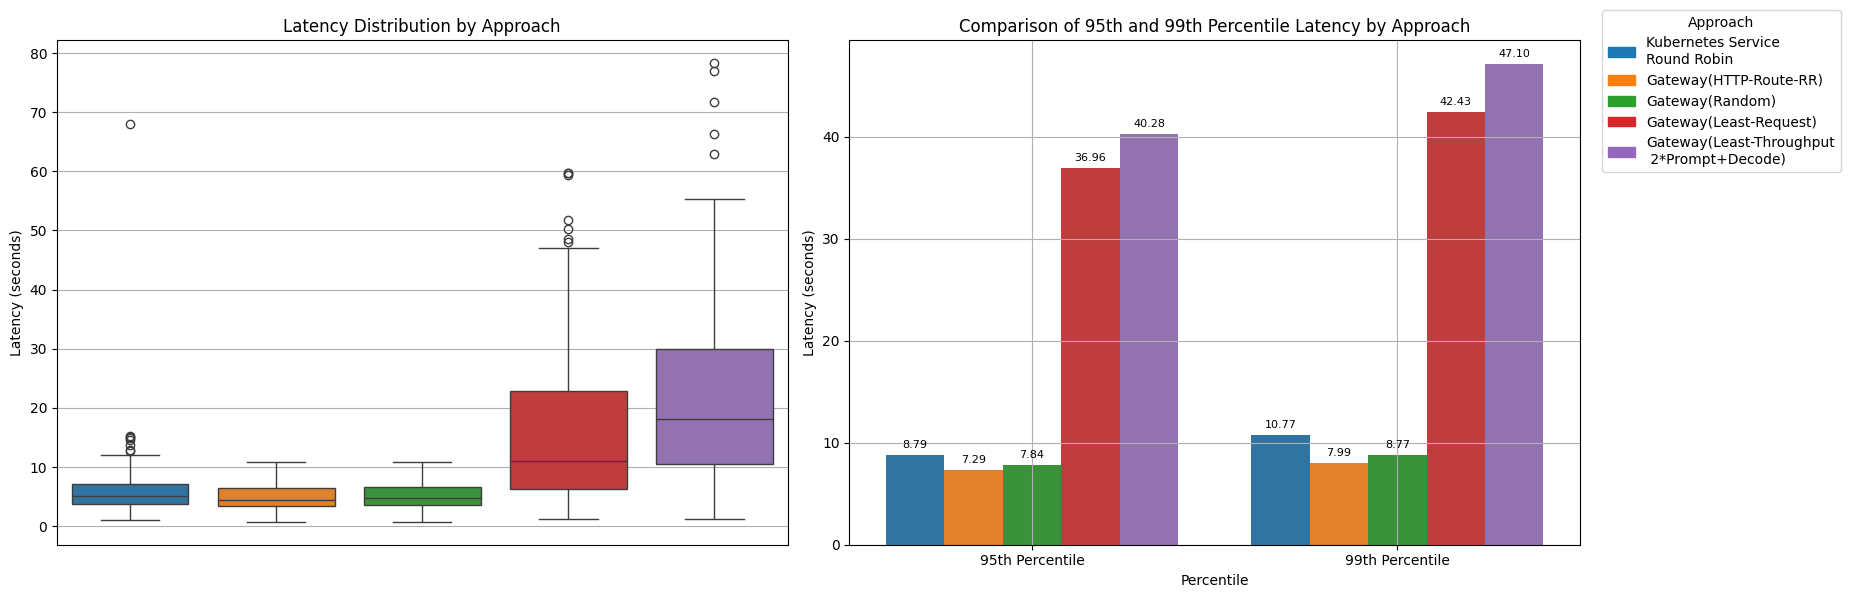

In [44]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import matplotlib.patches as mpatches

# Directory containing the .jsonl files
directory = 'gateway-routing-benchmark-result'  # change this to the actual folder path

# Mapping dictionary to replace approach names with descriptive labels
approach_mapping = {
    'k8s-service': 'Kubernetes Service\nRound Robin',
    'http-route': 'Gateway(HTTP-Route-RR)',
    'random': 'Gateway(Random)',
    'least-request': 'Gateway(Least-Request)',
    'least-throughput': 'Gateway(Least-Throughput\n 2*Prompt+Decode)'
}
approach_labels = list(approach_mapping.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
approach_order = ['k8s-service', 'http-route', 'random', 'least-request', 'least-throughput']

# List to store all latency data with their corresponding approach
latency_data = []

# Read all .jsonl files and extract latencies
for file_path in glob(os.path.join(directory, '*.jsonl')):
    file_name = os.path.basename(file_path)
    approach = file_name.split('.')[0]  # Extract approach name from file name

    with open(file_path, 'r') as f:
        for line in f:
            result = json.loads(line)
            latency = result['latency']
            descriptive_approach = approach_mapping.get(approach, approach)
            latency_data.append({'Approach': descriptive_approach, 'Latency': latency})

# Convert to DataFrame
df = pd.DataFrame(latency_data)
df['Approach'] = pd.Categorical(df['Approach'], categories=approach_labels, ordered=True)

# Calculate 95th and 99th percentiles for each approach
percentiles = df.groupby('Approach')['Latency'].quantile([0.95, 0.99]).unstack()
percentiles.columns = ['95th Percentile', '99th Percentile']
percentiles = percentiles.reset_index()

# Melt the DataFrame for easier plotting
melted_percentiles = pd.melt(percentiles, id_vars=['Approach'], value_vars=['95th Percentile', '99th Percentile'],
                             var_name='Percentile', value_name='Latency')
melted_percentiles['Percentile'] = pd.Categorical(melted_percentiles['Percentile'], 
                                                  categories=['95th Percentile', '99th Percentile'], 
                                                  ordered=True)
melted_percentiles = melted_percentiles.sort_values(['Percentile', 'Approach'])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plot for latency distribution
sns.boxplot(data=df, x='Approach', y='Latency', palette=colors, ax=ax1, legend=False)
ax1.set_xticks([])  # Hide x-axis labels as we have a legend
ax1.set_xlabel('')
ax1.set_ylabel('Latency (seconds)')
ax1.set_title('Latency Distribution by Approach')
ax1.grid(True)

# Plot 2: Bar plot for 95th and 99th percentiles
sns.barplot(data=melted_percentiles, x='Percentile', y='Latency', hue='Approach', palette=colors, ax=ax2, dodge=True, legend=False)
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.2f}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
ax2.set_xlabel('Percentile')
ax2.set_ylabel('Latency (seconds)')
ax2.set_title('Comparison of 95th and 99th Percentile Latency by Approach')
ax2.grid(True)

# Add a single shared legend for the entire figure
patches = [mpatches.Patch(color=colors[i], label=approach_labels[i]) for i in range(len(approach_labels))]
fig.legend(handles=patches, title="Approach", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()
